In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
plt.rcParams['figure.figsize'] = (20.0, 10.0)

Mean of x: 2.3333333333333335
Mean of y: 2.0
x squared: 7.0
Mean of x*y: 5.333333333333333
Slope is: 0.4285714285714285
Y - intercept: 1.0


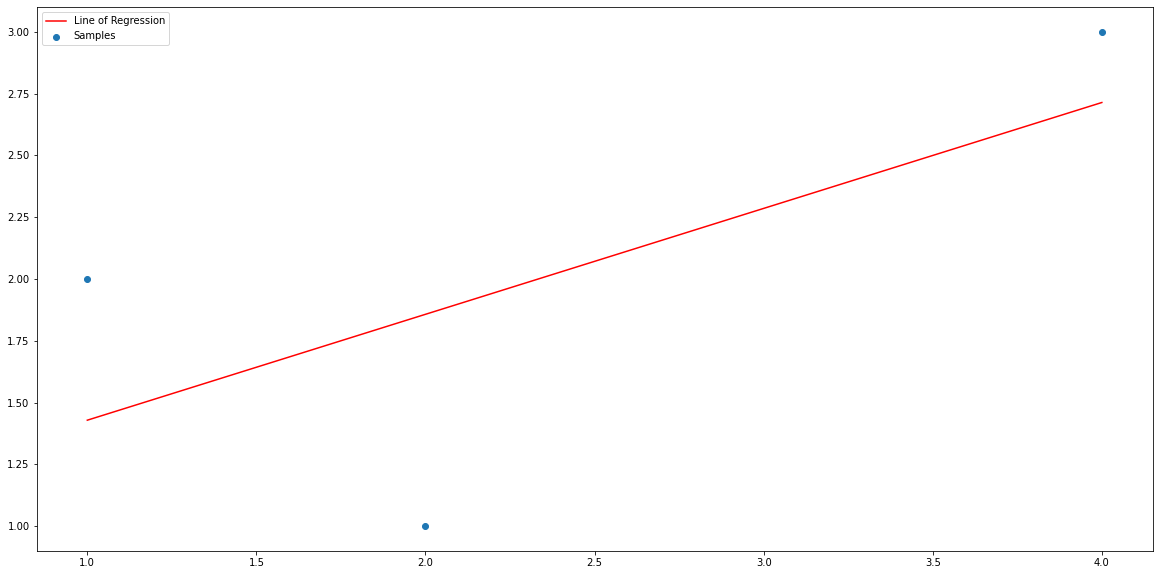

In [2]:
"""

Sample 1: Most basic example

Here we're going to find the line of linear regression using equations derived by hand,
and plot the results.

You can find these formulas in the notes at the bottom of this notebook.

"""
x = [1, 2, 4]
y = [2, 1, 3]

# First find the slope of the line of regression
x1 = np.mean(x) # mean of x
y1 = np.mean(y) # mean of y
x2 = np.mean([i ** 2 for i in x]) # mean of ∑x^2
xy = np.mean([i * ii for (i, ii) in zip(x, y)]) # mean of ∑xy

# Now find the slope of the line
n = (x1 * y1) - xy # numerator of slope of line of regression
d = x1 ** 2 - x2 # denominator of slope of line of regression
m = n / d # get the slope

# Now find the y - intercept
b = y1 - m * x1 # y intercept

print("Mean of x: {}".format(x1))
print("Mean of y: {}".format(y1))
print("x squared: {}".format(x2))
print("Mean of x*y: {}".format(xy))
print("Slope is: {}".format(m))
print("Y - intercept: {}".format(b))

# Create the regression line
X = np.linspace(np.min(x), np.max(x), 1000) # All X points
Y = b + m * X # All Y points relative to X (AKA predicted y values/dependent variable)

# Plot
plt.plot(X, Y, color='red', label='Line of Regression')
plt.scatter(x, y, label='Samples')
plt.legend()

In [ ]:
"""

Sample 2: Another basic example derived by hand.

This time we're going to reverse the equations around to demonstrate that you can
manipulate the equations algebraeically and still get the same result.

This doesn't show anything really that crazy, but the point is to show that
the equation to find "m" and "b" are actually just equations that have been
algebraeically manipulated from the following equation:

Standard Error of the Line = ∑((yi - (m * xi + b))^2)

"""
x = [-2, -1, 1, 4]
y = [-3, -1, 2, 3]

x1 = np.mean(x)
y1 = np.mean(y)
x2 = np.mean([i ** 2 for i in x])
xy = np.mean([i * ii for (i, ii) in zip(x, y)])
m = (xy - x1 * y1) / (x2 - x1 ** 2)
b = y1 - m * x1

X = np.linspace(np.min(x), np.max(x), 1000)
Y = m * X + b

plt.scatter(x, y, label='Samples')
plt.plot(X, Y, c='red', label='Line of Regression')
plt.legend()

In [ ]:
"""

Sample 3: Example with a larger data set.

Only difference here, is that we're going to read in a larger dataset
and watch the regression line follow the same patterns as before.

"""

# Read in data
data = pd.read_csv('Birth_Rates - index.csv')
data.head()

x = data['PovPct'].values
y = data['Brth15to17'].values

x1 = np.mean(x)
y1 = np.mean(y)
x2 = np.mean([i ** 2 for i in x])
xy = np.mean([i * ii for (i, ii) in zip(x, y)])
m = (xy - x1 * y1) / (x2 - x1 ** 2)
b = y1 - m * x1

X = np.linspace(np.min(x), np.max(x), 1000)
Y = m * X + b

plt.scatter(x, y, color='black', label='Samples')
plt.plot(X, Y, color='red', label='Line of Regression')
plt.legend()

In [ ]:
"""

Example 4: Determining R^2 or Goodness of Fit, aka Coefficient of Determination

In this example, we're going to continue building our models from scratch, except we're going to
add a step. We're going to figure out the R Squared. This number will tell us how good our
line is at predicting values.

In technical terms, the R Squared tells us how much of the variation in y can be described
by the variation in x.

The resulting R Squared of this data is ~57%

Another way of thinking about this is, which is not entirely accurate but paints a relevant
picture, if we were to make predictions in the future based on this model, we would be
generally on the ballpark 57% of the time. Again, this is not actually what this means,
but it's the general idea.

"""
data = pd.read_csv('Birth_Rates - Sheet1.csv')
data.head()

x = data['age'].values
y = data['FEV ht'].values

x1 = np.mean(x)
y1 = np.mean(y)
x2 = np.mean([i ** 2 for i in x])
xy = np.mean([i * ii for (i, ii) in zip(x, y)])
m = (xy - x1 * y1) / (x2 - x1 ** 2)
b = y1 - m * x1

X = np.linspace(np.min(x), np.max(x), 1000)
Y = m * X + b

# Calculating R Squared
y_pred = [m * i + b for i in x] # predicted y values
y_regr_var = np.mean([(i - ii) ** 2 for (i, ii) in zip(y, y_pred)]) # squared error with regression line
y_total_var = np.mean([(i - y1) ** 2 for i in y]) # total variance
r2 = 1 - (y_regr_var / y_total_var)

print("R Squared: {}%".format(r2 * 100))

plt.scatter(x, y, label='Samples')
plt.plot(X, Y, c='red', label='Line of Regression')
plt.legend()

In [ ]:
"""

Example 5: Using a statistical package

In this example we're going to use scikitlearn to do our modeling and calculations
for us to simplify the code.

We will recreate examples 3 and 4.

This doesn't really tell us much more than we've already looked at, it's just an
example of how to use the sklearn package to do basic regression.

"""

# Read in data
br_data = pd.read_csv('Birth_Rates - index.csv')
fev_data = pd.read_csv('Birth_Rates - Sheet1.csv')

# Extract the data, and add a dimension to each element in the array
# in order for it to work with the LinearRegression model
br_x = br_data['PovPct'].values.reshape(-1, 1)
br_y = br_data['Brth15to17'].values.reshape(-1, 1)

fev_x = fev_data['age'].values.reshape(-1, 1)
fev_y = fev_data['FEV ht'].values.reshape(-1, 1)

# Init models
br_model = LinearRegression()
fev_model = LinearRegression()

# Fit data to models
br_model.fit(br_x, br_y)
fev_model.fit(fev_x, fev_y)

# Get the predicted y values
br_y_pred = br_model.predict(br_x)
fev_y_pred = fev_model.predict(fev_x)

# Get the R Squared (as a %)
br_r2 = r2_score(br_y, br_y_pred) * 100
fev_r2 = r2_score(fev_y, fev_y_pred) * 100

# Get the Mean Squared Error
br_mse = mean_squared_error(br_y, br_y_pred)
fev_mse = mean_squared_error(fev_y, fev_y_pred)

print("Birth Rate R2 Score: {}%".format(br_r2))
print("FEV R2 Score: {}%".format(fev_r2))

print("Birth Rate Mean Squared Error: {}".format(br_mse))
print("FEV Mean Squared Error: {}".format(fev_mse))

plt.scatter(br_x, br_y, color='green', label='Birth Rate Samples')
plt.plot(br_x, br_y_pred, color='yellow', label='Birth Rate Regression')
plt.scatter(fev_x, fev_y, color='blue', label='FEV Samples')
plt.plot(fev_x, fev_y_pred, color='red', label='FEV Regression')
plt.legend()

In [ ]:
"""
Notes:
    
    Independent Variable
    - The variable that is constant. In the relationship, an increase in this variable,
      should result in an increase/decrease in the dependent variable.
    - Denoted as x
      
    Dependent Variable
    - The variable that changes depending on the independent variable.
    - Denoted as y
    
    R Squared
    - The R^2 is a value (represented as a %) which tells us how much of the relationship
      we can explain by our dependent variable. Normally, a higher variance (larger 
      standard error from the line of regression) will lead to a lower R^2. A lower variance,
      (smaller standard error from the line of regression) will mean that our independent
      variable can explain a lot about the variance in our dependent variable.
    
    Equations
    
    Slope intercept equation
    - y = b0 + b1 * x
    
        y | dependent variable
        b0 | y-intercept or constant
        b1 | Slope
        x | independent variable
        
        Change in b0: This changes the point in which the 'line of regression' intersects
                      the y-axis. It basically just moves the 'line of regression' up
                      or down.
                      
        Change in b1: This is the sensitivity of the slope. A change in this results
                      in a steeper or flatter line. A very steep line shows a sensitive
                      relationship. A flat line shows an insensitive relationship.
        
    Slope intercept with error equation
    - y = b0 + b1 * x + e
    
        e | error
        
        e is the standard error. This is the average distance away from the 'line of regression'
        that the real world data sits. The point of the 'line of regression' is to find a line
        that minimizes the standard error for each point of real world data.
        
    Find slope of the 'Line of Regression'
          (x1 * y1) - xy
    m = --------------------
             x1^2 - x2
    
        Where:
            x1 = mean of x
            y1 = mean of y
            x2 = mean of x^2
            xy = mean of ∑xy
            
    Y Intercept of 'Line of Regression'
    
    y = b0 - m * x1
    
        Where:
            b0 = y intercept
            y = predicted dependent variable
            m = slope of the line of regression
            x1 = mean of x
            
    R Squared
    
            (∑(yi - (m * xi + b))^2) / n
    r2 = --------------------------------
                (∑(y - y1)^2) / n
        Where:
            y = dependent variable
            x = independent variable
            y_pred = predicted y value based on x | y_pred = mx + b
            y_regr_var = squared error of y from regression line, aka variation described by x
            y_total_var = mean squared error of y, aka total variation in y, aka variance of y
            y1 = mean of y
            n = number of samples
            m = slope of regression line
            b = y intercept of regression line
    
"""